# SVM - SVC

C:\Users\Prasanth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Accuracy of SVM SVC with rbf kernel: 0.65


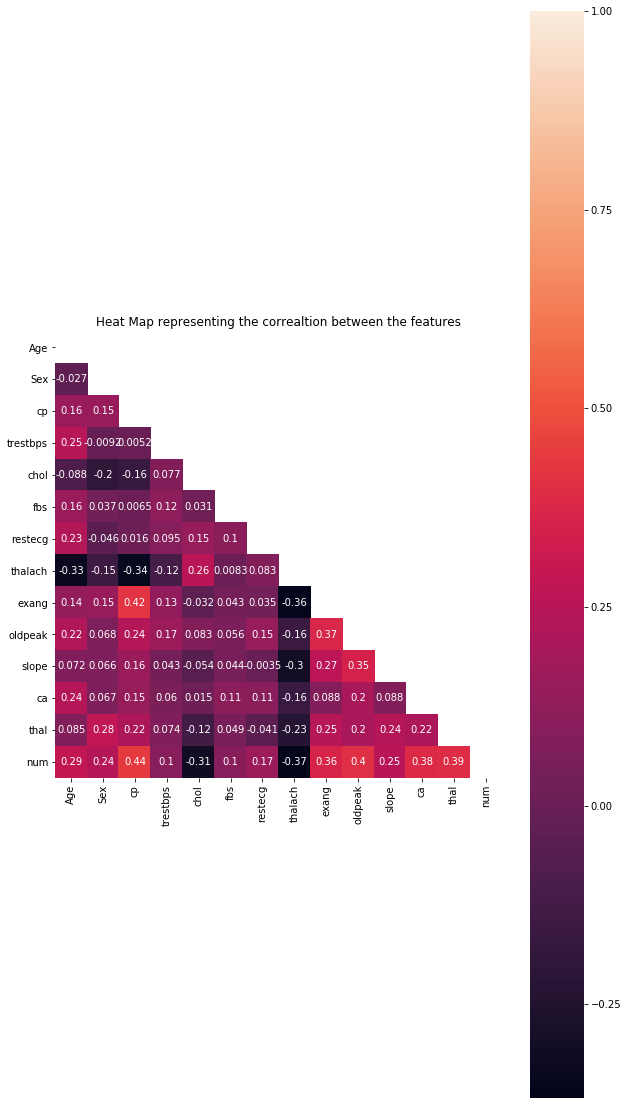

In [34]:
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

#getting data from all the csv files in the path
path='M:\Veridic_Solutions\Prasanth_Python_assignment_files\SVM'
data_files = glob.glob(path + "/*.csv")
data_list=[]
for file_name in data_files:
    data_list.append(pd.read_csv(file_name,header=None))
    
#Cresting a Pnadas dataframe from the appended data
data_frame = pd.concat(data_list,ignore_index = True)
data_frame.columns=['Age','Sex','cp','trestbps','chol','fbs','restecg',
                    'thalach','exang','oldpeak','slope','ca','thal','num']

# Replacing all the '?' in the data and replacing it with NaN
data_frame = data_frame.replace('?',np.nan)

# Imputing the missing data with the mean calculated column-wise
imputer = Imputer(missing_values='NaN', strategy="mean" )
imputed_df = imputer.fit_transform(data_frame)
imputed_df = pd.DataFrame(imputed_df, columns = data_frame.columns)

#plotting the correlation matrix to find out dependencies b/w the dependent and the independent features
figure,axes = plt.subplots(nrows=1)
figure.set_size_inches(10,20)
correlation_matrix = imputed_df.corr()
mask = np.zeros_like(correlation_matrix) 
mask[np.triu_indices_from(mask)]=True
corr_plot = sbn.heatmap(correlation_matrix,mask=mask,square=True,annot=True)
corr_plot.set_title("Heat Map representing the correaltion between the features")

# imputed_df_svr = imputed_df.drop([], axis=1) # Here we are not dropping any features as accuracy tends to decrese
#                                              # when any of the features are dropped

# Creating the test and train sets
X_train, X_test, y_train, y_test = train_test_split(imputed_df.iloc[:,1:-1], imputed_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=20)

#Normalizing the data - Z score normalization
Std_scaler = StandardScaler()
X_train = Std_scaler.fit_transform(X_train)
X_test = Std_scaler.transform(X_test)

#SVM
kernel = 'rbf'
SVM_svc = svm.SVC(kernel=kernel)
SVM_svc.fit(X_train,y_train)

#Predicting the dependent variable
y_pred_svm = SVM_svc.predict(X_test)

# Model Accuracy
print("Accuracy of SVM SVC with",kernel,"kernel:",round(SVM_svc.score(X_test,y_test),2))

# SVM - SVR

In [35]:


#dropping features with low correlation to the dependent
imputed_df_svr = imputed_df.drop([], axis=1) # Here we are not dropping any features as accuracy tends to decrese
                                             # when any of the features are dropped

# Creating the test and train sets
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(imputed_df_svr.iloc[:,:-1], 
                                                   imputed_df_svr.iloc[:,-1],test_size=0.2, random_state=49)
#Normalizing the data - Z score normalization
Std_scaler = StandardScaler()
X_train_svr = Std_scaler.fit_transform(X_train_svr)
X_test_svr = Std_scaler.transform(X_test_svr)

#SVM SVR
kernel = 'rbf'
SVM_svr = svm.SVR(kernel=kernel)
SVM_svr.fit(X_train_svr,y_train_svr)

#Predicting the dependent variable
y_pred_svr = SVM_svr.predict(X_test_svr)

# Model Accuracy
print("Accuracy of SVM SVR with",kernel,"kernel:",round(SVM_svr.score(X_test_svr,y_test_svr),2))

Accuracy of SVM SVR with rbf kernel: 0.5
